# Exercice Feature Engineering et PolynomialFeature

Sur le dataset diamonds : 

1. Créez une variable volume

2. Créez une variable qui donne le Rapport carat / volume. En effet Il pourrait être utile de créer une variable qui montre la densité apparente du diamant en comparant le poids (carat) au volume (volume). Les diamants avec une densité apparente élevée pourraient indiquer des caractéristiques spécifiques qui influencent le prix.

3. Determinez la corrélation entre ces nouvelles variables et le prix. Ces nouvelles associations sont-elles intéressantes ?

4. La variable Depth est elle-meme construite sur la base des variables x, y, et z. Saurez-vous trouver laquelle ?

5. Avez-vous d'autres idées de Feature Engineering?

6. Utilisez polynomial features pour tester des combinaisons de degré 2 et dites s'il existe des variables intéressantes.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("diamonds")
df.dropna(inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 1. Créez une variable volume

In [26]:
import sklearn
from sklearn.preprocessing import PolynomialFeatures
print("sklearn version :", sklearn.__version__)

df['volume'] = df['x'] * df['y'] * df['z']
df = df.query("volume < 3500")
df.head()

sklearn version : 1.5.2


,carat,cut,color,clarity,depth,table,price,x,y,z,volume,caravol
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,0.006021
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,0.006086
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,0.006040
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,0.006207
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,0.005971


### 2. Créez une variable qui donne le Rapport carat / volume. 
En effet Il pourrait être utile de créer une variable qui montre la densité apparente du diamant en comparant le poids (carat) au volume (volume). Les diamants avec une densité apparente élevée pourraient indiquer des caractéristiques spécifiques qui influencent le prix.

In [27]:
df['caravol'] = df['carat'] / df['volume']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,caravol
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,0.006021
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,0.006086
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,0.006040
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,0.006207
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,0.005971


### 3. Determinez la corrélation entre ces nouvelles variables et le prix. Ces nouvelles associations sont-elles intéressantes ?

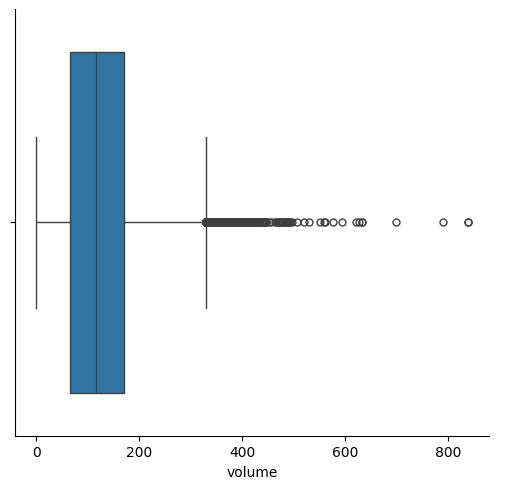

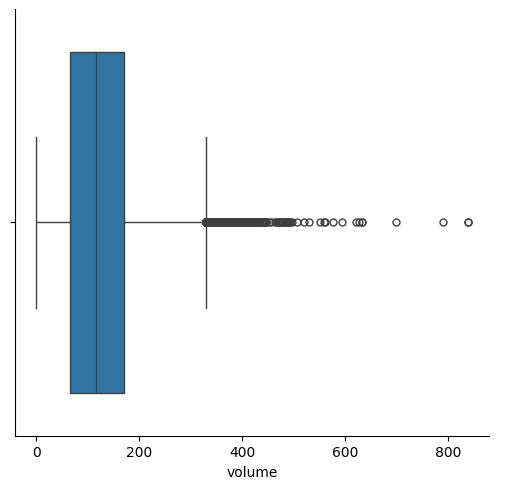

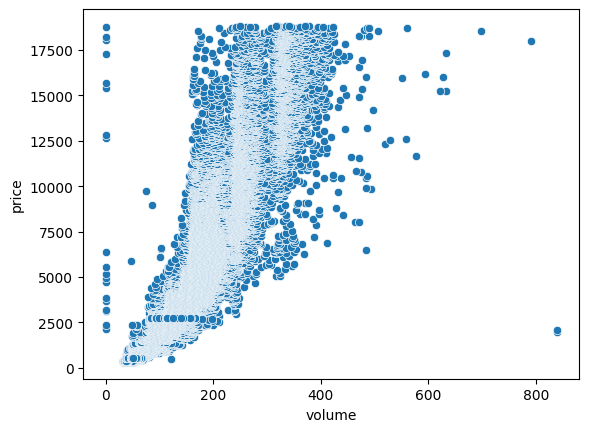

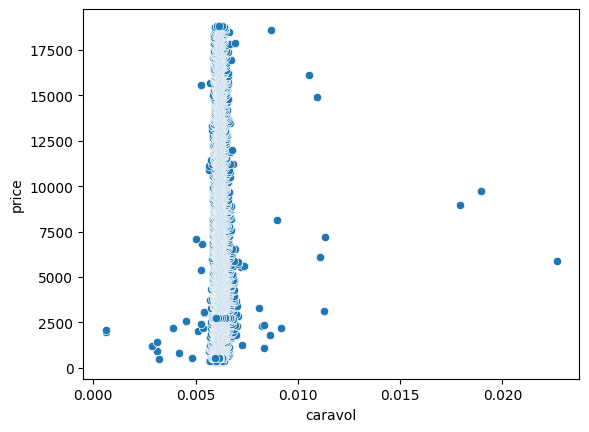

In [28]:
pd.Series(df['volume']).describe()
sns.catplot(data=df, x="volume", kind="box")
plt.show()
df = df.query("volume < 3500")
sns.catplot(data=df, x="volume", kind="box")
plt.show()
sns.scatterplot(df, x="volume", y="price")
plt.show()
sns.scatterplot(df, x="caravol", y="price")
plt.show()